In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../datasets/clustering_data2.csv')
df.head()
sub_df = df.iloc[:,[3,4]] #Annual Income against Spending Score
x1 = df[['Annual Income (k$)']]
x2 = df[['Spending Score (1-100)']]


In [16]:
df.shape

(200, 5)

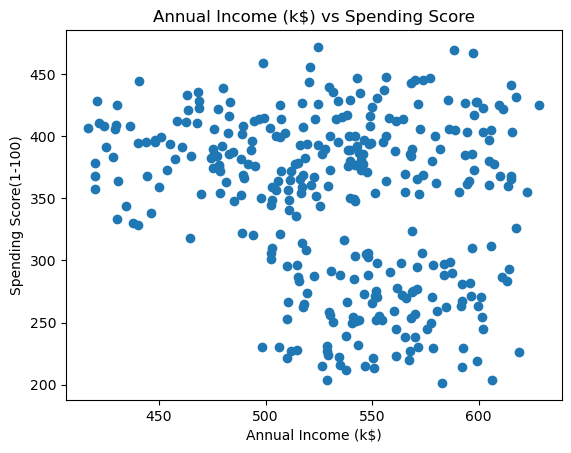

In [17]:
plt.figure()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Annual Income (k$) vs Spending Score')
plt.scatter(x,y)
plt.show()


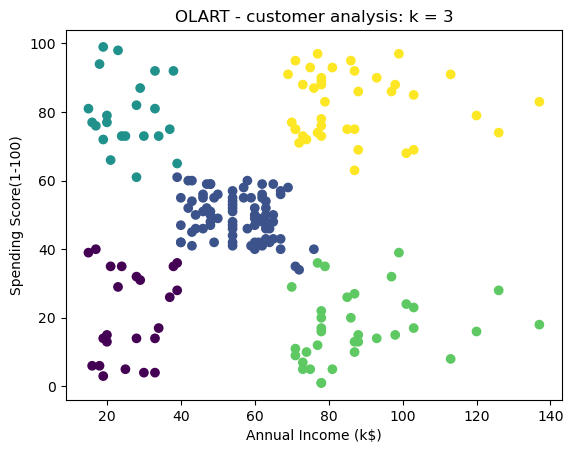

In [26]:
from sklearn.cluster import KMeans

k_choice = 5 #choice for k

km = KMeans(k_choice)

clusterIds = km.fit_predict(sub_df)

plt.figure()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.scatter(x1,x2,c=clusterIds)
plt.title('OLART - customer analysis: k = 3')
plt.show()


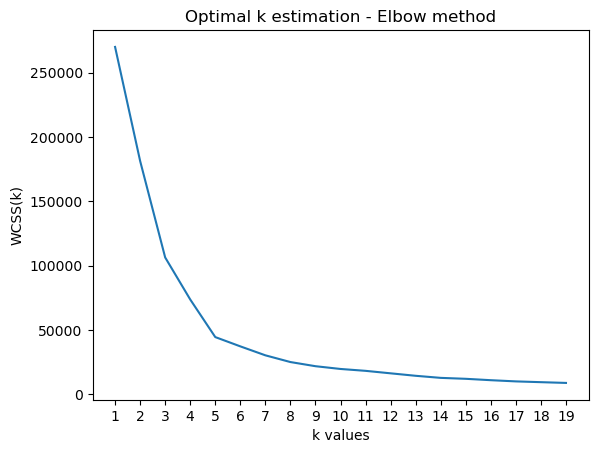

In [28]:
import numpy as np

wcss = []
for k in range(1,20): #set range k values to search form
    km = KMeans(k)
    km.fit(sub_df)
    wcss_iter = km.inertia_ #store the WCSS per the current k
    wcss.append(wcss_iter)
    
    
plt.figure()
plt.plot(np.arange(1,20),wcss)
plt.xticks(range(1,20))
plt.xlabel('k values')
plt.ylabel('WCSS(k)')
plt.title('Optimal k estimation - Elbow method')
plt.show()

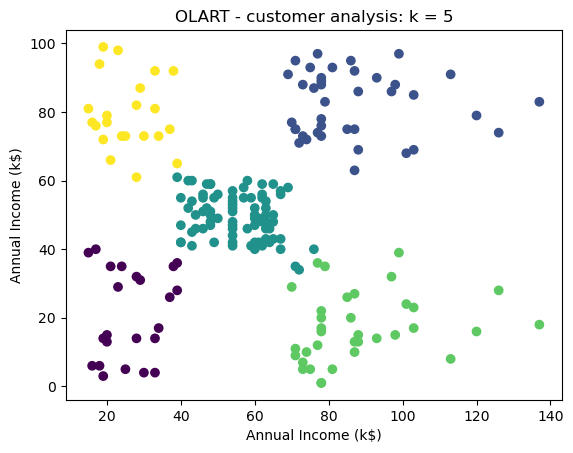

In [29]:
k_optimal = 5 #sharpest bend at k=5
km = KMeans(k_optimal)
clusterIds = km.fit_predict(sub_df)  #get data group labels

plt.figure()
plt.xlabel(sub_df.columns[0])
plt.ylabel(sub_df.columns[0])
plt.scatter(x1,x2,c=clusterIds)
plt.title('OLART - customer analysis: k = %d'%k_optimal)
plt.show()

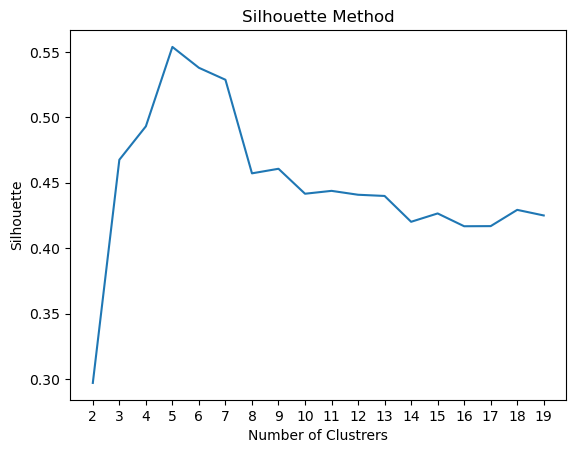

optimal cluster: 5


In [39]:
from sklearn.metrics import silhouette_score

sv = []
svMax= -100
svId=0
#print(sub_df)
for i in range(2,20):
    kmeans = KMeans(i)
    kmeans.fit(sub_df)
    score = silhouette_score(sub_df,kmeans.labels_,metric='euclidean')
    
    if score > svMax:
        svMax = score
        svId = i
    
    sv.append(score)
    
plt.figure()
plt.plot(np.arange(2,20),sv)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette')
plt.xticks(range(2,20))
plt.title('Silhouette Method')
plt.show()

print(f"optimal cluster: {svId}")